In [1]:
import numpy as np
import matplotlib.axes as ax 
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Hypothesis Testing - differences of means
sample_mean_g = 123.5
sample_sd_g = np.sqrt(98)
n_g = 60
sample_ht_g = np.random.normal(loc=sample_mean_g, scale=sample_sd_g, size=n_g)

sample_mean_b = 126.2
sample_sd_b = np.sqrt(120)
n_b = 50
sample_ht_b = np.random.normal(loc=sample_mean_b, scale=sample_sd_b, size=n_b)

print("Girls")
print("Observations:", len(sample_ht_g))
print("Mean:", np.mean(sample_ht_g))
print("standard Deviation:", np.std(sample_ht_g))
print("Variance:", np.std(sample_ht_g)**2)
#print(sample_ht_g(:5))

print("Boys")
print("Observations:", len(sample_ht_b))
print("Mean:", np.mean(sample_ht_b))
print("standard Deviation:", np.std(sample_ht_b))
print("Variance:", np.std(sample_ht_b)**2)

Girls
Observations: 60
Mean: 123.6208798190245
standard Deviation: 9.71225692617883
Variance: 94.32793460010865
Boys
Observations: 50
Mean: 126.85101434111368
standard Deviation: 10.006581855206035
Variance: 100.13168042493865


In [13]:
obs_diff = sample_mean_g-sample_mean_b
obs_diff

exp_diff =0
vng = (sample_sd_g**2)/n_g
vnb = (sample_sd_b**2)/n_b
std_err = np.sqrt(vng + vnb)

print("Sample Difference:", obs_diff)
print("Expected population difference:", exp_diff)
print("Standard Error:", std_err)

Sample Difference: -2.700000000000003
Expected population difference: 0
Standard Error: 2.008316044185609


In [16]:
z = (obs_diff - exp_diff)/std_err
print("z-score:", z)

#Fail to reject the null hypothesis 

z-score: -1.3444099138763181


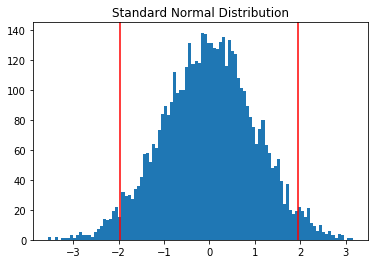

In [23]:
# plot the standard normal distribution

stdn_data = np.random.randn(5000)

stdn = plt.figure()
plt.hist(stdn_data, bins=100)
plt.axvline(x=-1.96, color='r')
plt.axvline(x=1.96, color='r')
plt.title("Standard Normal Distribution")
plt.show()
stdn.savefig("standard_normal.png")

In [35]:
import statsmodels.formula.api as smf
import pandas as pd

demo = pd.read_csv("county_demographics_2016.csv")
demo.head()

,fips,adult_pop,female_pop,male_pop,median_age,population,pct_poverty,median_income,pct_highschool,pct_unemployed
0,1001,41890.0,28422.0,26994.0,38.6,55416.0,13.5,54487.0,87.6,3.4
1,1003,163233.0,107322.0,101241.0,42.9,208563.0,11.7,56460.0,90.0,3.7
2,1005,20477.0,12186.0,13779.0,40.1,25965.0,29.9,32884.0,73.8,6.2
3,1007,17944.0,10498.0,12145.0,39.6,22643.0,20.1,43079.0,80.7,3.5
4,1009,44322.0,29206.0,28498.0,41.1,57704.0,14.1,47213.0,80.0,3.0


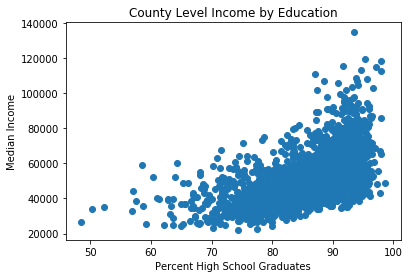

In [36]:
inc_edu = plt.figure()
plt.scatter(demo['pct_highschool'], demo['median_income'])
plt.title('County Level Income by Education')
plt.xlabel('Percent High School Graduates')
plt.ylabel("Median Income")
plt.show()

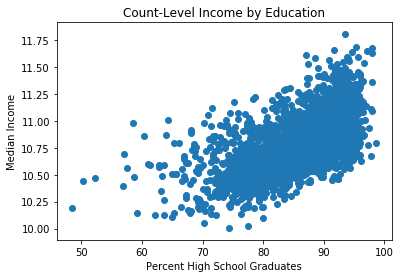

In [45]:
#transform the outcome variable
demo['median_income'].head()

ln_inc_edu = plt.figure()
plt.scatter(demo['pct_highschool'], np.log(demo['median_income']))
np.log(demo['median_income']).head()
plt.title("Count-Level Income by Education")
plt.xlabel("Percent High School Graduates")
plt.ylabel("Median Income")
plt.show()

In [43]:
model = smf.ols(formula="np.log(median_income) ~ pct_highschool",data=demo)
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(median_income)   R-squared:                       0.371
Model:                               OLS   Adj. R-squared:                  0.371
Method:                    Least Squares   F-statistic:                     1852.
Date:                   Wed, 06 Jun 2018   Prob (F-statistic):          2.20e-318
Time:                           11:41:31   Log-Likelihood:                 720.56
No. Observations:                   3140   AIC:                            -1437.
Df Residuals:                       3138   BIC:                            -1425.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8415      0.045    195.703      0.000       8.753       8.930
pct_highschool     0.0226      0.001     43.031      0.000       0.022       0.024
==============================================================================
Omnibus:                      310.224   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.689
Skew:                           0.769   Prob(JB):                     1.23e-96
Kurtosis:                       4.006   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""